# Load data

In [1]:
#from structure_and_load import load
import os
import scipy.io as sio 

import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
def matlab_file_(path):
    """
    Open a matlab behaviour structure from OrganizeBehaviour and save it in a python dictionary. One
    SESSION corresponds to one behavioural file - independently of the number of probes.
    :param filename: name of the matlab structure containing the behavioural information
    :return: behaviour: dictionary containing the same fields as the behaviour structure from matlab
    """
    # initialize a counter for the number of files loaded
    n_file = -1
    # get filenames in list in the session directory
    filenames = os.listdir(path)

    data = [] 
    load_info = []
    
    # Loop through MATLAB files in the session directory
    for matfile in filenames:

        n_file += 1  
        print(f'loading {matfile}')
        load_info.append((n_file, matfile))

        # get the full file path for the current file and load MATLAB file
        filepath = os.path.join(path, matfile) 
        matfile = sio.loadmat(filepath)

        # get the name of the sub-structure within the MATLAB file
        data_str_name = list(matfile.keys())[-1]

        # get the field names within the sub-structure and use them as keys for the new dictionary
        fields = []
        for key in matfile[data_str_name].dtype.fields.keys():
            fields.append(key)

        # Extract the data inside the sub-structure and save dictionnary in list
        data_ = matfile[data_str_name][0][0]
        data.append({field: data_[i_field][:, 0] for i_field, field in enumerate(fields)})
        

    print(f'\n{n_file + 1} files loaded')
    
    return data, load_info

In [3]:
session = 't150204001'
save_dat = False
pc_labo = False

if pc_labo == True:
    data_path = f'/home/INT/mifsud.l/Bureau/data/Tommy_new/{session}/modified_data/'
    info_path = f'/home/INT/mifsud.l/Bureau/data/Tommy_new/TomyCerebusSpikes_Updated_June2023.xlsx'
    result_path = f'/home/INT/mifsud.l/Bureau/results/'

else:
    data_path = f'/home/laurie/Bureau/pattern_classification/data/Tommy_new/{session}/modified_data/'
    info_path = '/home/laurie/Bureau/pattern_classification/data/Tommy_new/session_info.xlsx'
    result_path = '/home/laurie/Bureau/pattern_classification/results/classif_new_data'

#load data
data, load_info = matlab_file_(data_path)

loading t150204001_probe1_contact6_unit1.mat
loading t150204001_probe2_contact24_unit1.mat
loading t150204001_probe1_contact19_unit1.mat
loading t150204001_probe1_contact17_unit1.mat
loading t150204001_probe1_contact12_unit1.mat
loading t150204001_probe2_contact7_unit4.mat
loading t150204001_probe2_contact14_unit1.mat
loading t150204001_probe2_contact9_unit3.mat
loading t150204001_probe1_contact1_unit1.mat
loading t150204001_probe2_contact23_unit1.mat
loading t150204001_probe2_contact19_unit1.mat
loading t150204001_probe2_contact8_unit1.mat
loading t150204001_probe2_contact21_unit1.mat
loading t150204001_probe1_contact5_unit1.mat
loading t150204001_probe1_contact13_unit1.mat
loading t150204001_probe2_contact10_unit1.mat
loading t150204001_probe2_contact9_unit1.mat
loading t150204001_probe1_contact11_unit3.mat
loading t150204001_probe1_contact4_unit1.mat
loading t150204001_probe2_contact5_unit1.mat
loading t150204001_probe2_contact18_unit1.mat
loading t150204001_probe2_contact2_unit1.ma

# Stucture

## info session / units

In [4]:
import re
df = pd.read_excel(info_path)
df.dropna(how='all', inplace=True)
df.drop(columns=['BehDir', 'pitch', 'A/P', 'Lat', 'depth', 'SNR', 'Unnamed: 14', 'depth (no buffer)'], inplace=True)
df.rename(columns={'%Plexon_spike_file' : 'Plexon_spike_file'}, inplace=True)
float_column_names = df.select_dtypes(include=['float']).columns
df[float_column_names] = df[float_column_names].astype(int)

In [5]:
list_prob = []
list_chan = []
list_unit = []

info_units = []

for i in range(len(load_info)) :
    matfile = load_info[i][1]
    # get contact and unit indices from filename
    match_probe = re.search(r'probe(\d+)', matfile)
    match_contact = re.search(r'contact(\d+)', matfile)
    match_unit = re.search(r'unit(\d+)', matfile)

    info_units.append({
        'probe':int(match_probe.group(1)), 
        'contact':int(match_contact.group(1)), 
        'unit':int(match_unit.group(1))})


    list_prob.append(int(match_probe.group(1)))
    list_chan.append(int(match_contact.group(1)))
    list_unit.append(int(match_unit.group(1)))

#info_units = pd.DataFrame(info_units)
sub_info_session = df[df['Plexon_spike_file'].str.startswith(f'{session}')]


info_session = pd.DataFrame()
list_idx = []
for i in range(len(list_unit)):
    sub_data = sub_info_session[(sub_info_session['probe'] == list_prob[i]) & (sub_info_session['channel'] == list_chan[i]) & (sub_info_session['unit'] == list_unit[i])]
    list_idx.append(sub_data.index[0])
    info_session = pd.concat((info_session, sub_data))

In [6]:
info_units

[{'probe': 1, 'contact': 6, 'unit': 1},
 {'probe': 2, 'contact': 24, 'unit': 1},
 {'probe': 1, 'contact': 19, 'unit': 1},
 {'probe': 1, 'contact': 17, 'unit': 1},
 {'probe': 1, 'contact': 12, 'unit': 1},
 {'probe': 2, 'contact': 7, 'unit': 4},
 {'probe': 2, 'contact': 14, 'unit': 1},
 {'probe': 2, 'contact': 9, 'unit': 3},
 {'probe': 1, 'contact': 1, 'unit': 1},
 {'probe': 2, 'contact': 23, 'unit': 1},
 {'probe': 2, 'contact': 19, 'unit': 1},
 {'probe': 2, 'contact': 8, 'unit': 1},
 {'probe': 2, 'contact': 21, 'unit': 1},
 {'probe': 1, 'contact': 5, 'unit': 1},
 {'probe': 1, 'contact': 13, 'unit': 1},
 {'probe': 2, 'contact': 10, 'unit': 1},
 {'probe': 2, 'contact': 9, 'unit': 1},
 {'probe': 1, 'contact': 11, 'unit': 3},
 {'probe': 1, 'contact': 4, 'unit': 1},
 {'probe': 2, 'contact': 5, 'unit': 1},
 {'probe': 2, 'contact': 18, 'unit': 1},
 {'probe': 2, 'contact': 2, 'unit': 1},
 {'probe': 1, 'contact': 1, 'unit': 2},
 {'probe': 2, 'contact': 7, 'unit': 3},
 {'probe': 1, 'contact': 11,

In [7]:
def convert_elitrials(entry):
    if pd.notna(entry):  # Check for NaN
        # Remove square brackets and split by space to separate pairs
        pairs = entry.replace('[', '').replace(']', '').split()
        result = []
        for pair in pairs:
            start, end = map(int, pair.split(':'))
            result.append([start, end])
        return result
    else:
        return None
        
info_session['elitrials'] = info_session['elitrials'].apply(convert_elitrials)

In [8]:
print(info_session.shape)
print(len(load_info))

(45, 8)
43


In [9]:
info_session.sample(5)

Plexon_spike_file  probe  channel  unit  start  stop  \
160  t150204001_chan_01_24_new      1        4     1      1     3   
191  t150204001_chan_25_48_new      2        9     1      1     5   
171  t150204001_chan_01_24_new      1       13     1      1     8   
199  t150204001_chan_25_48_new      2       17     1      4    10   
168  t150204001_chan_01_24_new      1       11     3      4     8   

     SUA (1), MUA (2), unstable (3) few trials (4) or observation (5)  \
160                                                  1                  
191                                                  1                  
171                                                  1                  
199                                                  1                  
168                                                  1                  

        elitrials  
160          None  
191          None  
171          None  
199  [[170, 173]]  
168  [[129, 139]]

In [10]:
first_bloc = info_session['start'].min()
last_bloc = info_session['stop'].max()

print(f'start / stop:\n   {first_bloc} /   {last_bloc}')

tasktime = info_session[(info_session['start'] == first_bloc) & (info_session['stop'] == last_bloc) & (info_session['elitrials'].isna())]
tasktimeComplete = tasktime.shape[0] != 0

if tasktimeComplete :
    unit_info = tasktime[['probe', 'channel', 'unit']].values[0]
    print(f"{tasktime[['start', 'stop', 'elitrials']]} \n\nunit_info : {unit_info}")
    matfile = f'{session}_probe{unit_info[0]}_contact{unit_info[1]}_unit{unit_info[2]}.mat'

    for i in load_info:
        if i[1] == matfile:
            completeUnit = i[0]
            print(f"{i[1]}\n\nunit's loading index = {completeUnit}")

else :
    print('ANY UNIT RECORDED OVER ENTIRE SESSION') 
    print(f"check here to construct session times by hand :\n {info_session['start'] == first_bloc}")

tasktime

start / stop:
   1 /   11
     start  stop elitrials
159      1    11      None 

unit_info : [1 3 1]
t150204001_probe1_contact3_unit1.mat

unit's loading index = 32


Plexon_spike_file  probe  channel  unit  start  stop  \
159  t150204001_chan_01_24_new      1        3     1      1    11   

     SUA (1), MUA (2), unstable (3) few trials (4) or observation (5)  \
159                                                  1                  

    elitrials  
159      None

## data (modif)

In [11]:
import numpy as np

In [12]:
# get spike train / periodes times / target info
spike_times = []
task_data = []
target_info = []
target_keys = ['SC1_dir', 'SC2_dir', 'SC3_dir', 'Trial_type']
#event_keys_OFF = ['Sel_OFF', 'SC1_OFF', 'SC2_OFF', 'SC3_OFF']
event_keys_OFF = []


for unit_idx in range(len(data)):
    spike_times.append((load_info[unit_idx], data[unit_idx]['ts']))  

    # List of keys to extract (excluding 'ts', cues direction and times OFF to be constistent with previous results)
    times_keys = [key for key in data[unit_idx] if key != 'ts' and key not in target_keys]
    task_info = {}
    for key_time in times_keys :
        task_info[key_time] = data[unit_idx][key_time]
    task_data.append((load_info[unit_idx],task_info))

    target_ = {}
    for key_target in target_keys :
        target_[key_target] = data[unit_idx][key_target]
    target_info.append((load_info[unit_idx], target_))

    event_labels = list(task_data[0][1].keys())


print(f'spike train sample : {spike_times[0][1]}\nevents : {event_labels}\ntargets : {target_info[0][1].keys()}')

spike train sample : [    334    5067    6996 ... 3658225 3659812 3660582]
events : ['Touch_time', 'Sel_ON', 'Sel_OFF', 'SC1_ON', 'SC1_OFF', 'SC2_ON', 'SC2_OFF', 'SC3_ON', 'SC3_OFF', 'Go_time', 'Target_time']
targets : dict_keys(['SC1_dir', 'SC2_dir', 'SC3_dir', 'Trial_type'])


### Time

In [13]:
# get event times by trial for each neuron
def events(task_data):
    """
    Retrieves event times from task data file sorts them for each unit

    Args:
    - task_data (list): List of tuples where each tuple contains file information and a dictionary of task-related data.

    Returns:
    - event_times (list of numpy.ndarray): List of arrays containing event times.

    Example usage:
    - event_labels, event_times, event_times_vector = event_times(task_data)
    """

    # Get event times by event labels
    event_times = []
    for unit_idx in range(len(task_data)):
        times = []
        for event in event_labels:
            times.append(task_data[unit_idx][1][event])
        event_times.append((task_data[unit_idx][0], np.array(times, dtype=object)))

    return event_times

event_times = events(task_data)

In [14]:
unit_ = 0
tstart = 0
tstop = 8

print(f'unit file : {event_times[unit_][0][1]}\n')
for event in range(len(event_labels)):
    print(f'n_trials = {len(event_times[unit_][1][event])}')
    print(f'{event_labels[event]} from trial {tstart} to trial {tstop}')
    print(event_times[unit_][1][event][tstart:tstop])

unit file : t150204001_probe1_contact6_unit1.mat

n_trials = 49
Touch_time from trial 0 to trial 8
[2330253 2465671 2475949 2716143 2758148 2769184 2778912 2795883]
n_trials = 49
Sel_ON from trial 0 to trial 8
[2331358 2466748 2477014 2717230 2759224 2770251 2779982 2796950]
n_trials = 49
Sel_OFF from trial 0 to trial 8
[2331678 2467055 2477321 2717547 2759531 2770558 2780320 2797270]
n_trials = 49
SC1_ON from trial 0 to trial 8
[2332679 2468070 2478323 2718548 2760533 2771559 2781317 2798271]
n_trials = 49
SC1_OFF from trial 0 to trial 8
[2333000 2468377 2478629 2718869 2760853 2771866 2781624 2798578]
n_trials = 49
SC2_ON from trial 0 to trial 8
[2334014 2469378 2479631 2719869 2761854 2772867 2782626 2799579]
n_trials = 49
SC2_OFF from trial 0 to trial 8
[2334335 2469685 2479938 2720190 2762174 2773188 2782933 2799887]
n_trials = 49
SC3_ON from trial 0 to trial 8
[2335349 2470700 2480952 2721191 2763176 2774189 2783934 2800888]
n_trials = 49
SC3_OFF from trial 0 to trial 8
[2335669 

In [15]:
unit_ = completeUnit
tstart = 0
tstop = 8

print(event_times[unit_][0])
for event in range(len(event_labels)):
    print(f'n_trials = {len(event_times[unit_][1][event])}')
    print(f'{event_labels[event]} from trial {tstart} to trial {tstop}')
    print(event_times[unit_][1][event][tstart:tstop])

(32, 't150204001_probe1_contact3_unit1.mat')
n_trials = 176
Touch_time from trial 0 to trial 8
[61233 105639 179281 216446 226804 244498 255327 270484]
n_trials = 176
Sel_ON from trial 0 to trial 8
[62310 106751 180344 217522 227881 245596 256410 271562]
n_trials = 176
Sel_OFF from trial 0 to trial 8
[62628 107095 180664 217829 228205 245903 256730 271869]
n_trials = 176
SC1_ON from trial 0 to trial 8
[63629 108096 181696 218831 229203 246905 257731 272870]
n_trials = 176
SC1_OFF from trial 0 to trial 8
[63936 108403 182013 219138 229510 247212 258038 273190]
n_trials = 176
SC2_ON from trial 0 to trial 8
[64937 109404 183014 220139 230511 248213 259039 274191]
n_trials = 176
SC2_OFF from trial 0 to trial 8
[65258 109711 183321 220459 230818 248520 259346 274512]
n_trials = 176
SC3_ON from trial 0 to trial 8
[66258 110712 184322 221460 231836 249521 260365 275513]
n_trials = 176
SC3_OFF from trial 0 to trial 8
[66566 111019 184642 221785 232169 249868 260681 275836]
n_trials = 176
Go_ti

In [16]:
# reshape times by trials / periods for each neuron + Neo format
import numpy as np
import pandas as pd
from neo.core import Event
from quantities import s 
from quantities import millisecond as ms
import numpy as np

# to go further with NEO : https://neo.readthedocs.io/en/stable/grouping.html


def events_by_trial(event_times, event_labels):
    '''
    Structure periods timestamps by trial and store in a data frame.

    Args:
    - event_times (numpy.ndarray): Array of event times where rows represent events, and columns represent trials.
    - event_labels (list): List of event labels corresponding to the columns of the data frame.

    Returns:
    - trials_ts (list of numpy.ndarray): List of event times structured by trial.
    - df_task_ts (list of pandas.DataFrame): List of data frames containing event times structured by trial.
    - events (list of list): List of Event objects.

    '''
    trials_ts = []  # List to store event times structured by trial
    df_task_ts_by_neuron = []  # List to store data frames containing event times structured by trial
    events = []  # List to store Event objects

    for unit_idx in range(len(event_times)):
        n_events = event_times[unit_idx][1].shape[0]
        n_trials = event_times[unit_idx][1].shape[1]

        events_ts = np.zeros((n_trials, n_events), dtype=int)
        event_list = []

        # Split time stamps for each period according to the trial
        for trial in range(n_trials):
            for event in range(n_events):
                events_ts[trial][event] = event_times[unit_idx][1][event][trial]
            
            event_list.append(Event(events_ts[trial] * ms, labels=event_labels, dtype='U'))

        events.append((event_times[unit_idx][0], event_list))
        trials_ts.append((event_times[unit_idx][0], events_ts))
        task_ts = pd.DataFrame(events_ts, columns=event_labels)
        df_task_ts_by_neuron.append((event_times[unit_idx][0], task_ts))

    return trials_ts, df_task_ts_by_neuron, events

trials_ts, df_task_ts_by_neuron, events = events_by_trial(event_times, event_labels)

unit_ = 6
trial_ = 0
print(f'times as list : {trials_ts[unit_][1][trial_]}')
print(f'times as neo events : {events[unit_][1][trial_].times}')
df_task_ts_by_neuron[unit_][1].head()

times as list : [1026429 1027493 1027800 1028801 1029122 1030123 1030430 1031431 1031738
 1032716 1033250]
times as neo events : [1026429. 1027493. 1027800. 1028801. 1029122. 1030123. 1030430. 1031431.
 1031738. 1032716. 1033250.] ms


Touch_time   Sel_ON  Sel_OFF   SC1_ON  SC1_OFF   SC2_ON  SC2_OFF   SC3_ON  \
0     1026429  1027493  1027800  1028801  1029122  1030123  1030430  1031431   
1     1035281  1036357  1036664  1037665  1037972  1038974  1039281  1040282   
2     1108631  1109726  1110033  1111034  1111342  1112343  1112650  1113651   
3     1129500  1130605  1130912  1131913  1132220  1133222  1133542  1134546   
4     1139902  1140978  1141285  1142286  1142593  1143594  1143901  1144902   

   SC3_OFF  Go_time  Target_time  
0  1031738  1032716      1033250  
1  1040589  1041567      1042151  
2  1113958  1114936      1115725  
3  1134864  1135842      1136375  
4  1145212  1146190      1146777

In [17]:
unit_ = completeUnit
trial_ = 0
print(f'times as list : {trials_ts[unit_][1][trial_]}')
print(f'times as neo events : {events[unit_][1][trial_].times}')
df_task_ts_by_neuron[unit_][1].tail()

times as list : [61233 62310 62628 63629 63936 64937 65258 66258 66566 67543 68156]
times as neo events : [61233. 62310. 62628. 63629. 63936. 64937. 65258. 66258. 66566. 67543.
 68156.] ms


Touch_time   Sel_ON  Sel_OFF   SC1_ON  SC1_OFF   SC2_ON  SC2_OFF  \
171     3427744  3428813  3429131  3430132  3430439  3431440  3431747   
172     3488819  3489885  3490205  3491206  3491513  3492515  3492822   
173     3498993  3500111  3500418  3501419  3501726  3502727  3503047   
174     3518800  3519868  3520188  3521190  3521497  3522498  3522805   
175     3534627  3535700  3536007  3537009  3537316  3538317  3538638   

      SC3_ON  SC3_OFF  Go_time  Target_time  
171  3432749  3433056  3434034      3434577  
172  3493823  3494143  3495121      3495791  
173  3504049  3504356  3505334      3506030  
174  3523823  3524140  3525133      3525652  
175  3539639  3539959  3540937      3541739

### spikes 

In [18]:
# get spike by trial for each neuron + Neo format (SpikeTrain)
from neo.core import SpikeTrain

def spike_by_trial_only(trials_ts, spike_times):  
    '''split the spike time vector by trial RUN WITH EVENT TIMES NOT ALIGNED'''

    spk_trials = []
    spike_train = []

    
    n_neurons = len(spike_times)

    for unit_idx in range(n_neurons):
        spk_trials.append([])
        spike_train.append([])

        n_trials = trials_ts[unit_idx][1].shape[0]

        for trial in range(n_trials):
            # define the start and end time of each trial
            t_start = trials_ts[unit_idx][1][trial,0]
            t_stop = trials_ts[unit_idx][1][trial,-1]
            
            # get spikes between start and end of trial 
            spk_tmp = spike_times[unit_idx][1] 
            sel_spk = np.logical_and(spk_tmp>t_start, spk_tmp<t_stop)
            
            # for trials without spikes 
            if spk_tmp[sel_spk].shape[0] == 0:
                spk_trials[unit_idx].append([])
                spike_train[unit_idx].append([])

            else :
                spk_ts_trial = spk_tmp[sel_spk] 
                # fill the matrice with spike times aligned to 0
                spk_trials[unit_idx].append(spk_ts_trial)
                spike_train[unit_idx].append(spk_ts_trial* ms)

    return spk_trials, spike_train


In [19]:
spk_trials, spike_train_trial = spike_by_trial_only(trials_ts, spike_times)

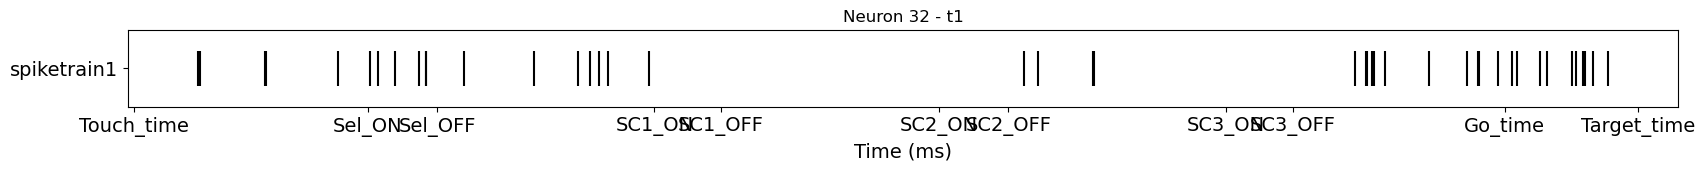

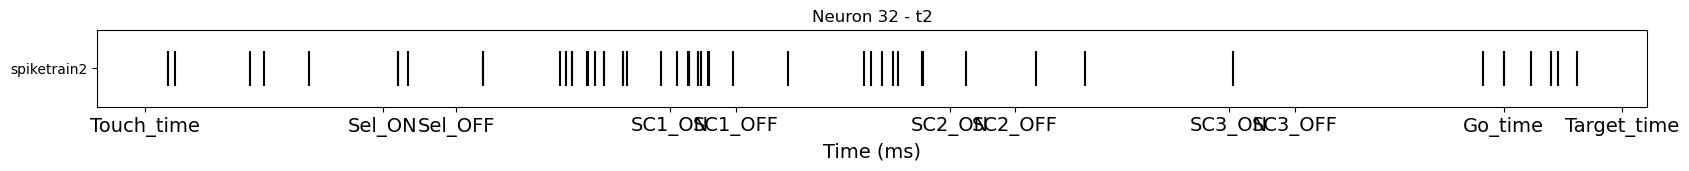

In [20]:
import matplotlib.pyplot as plt 

neuron = completeUnit

spiketrain1 = spike_train_trial[neuron][0]
spiketrain2 = spike_train_trial[neuron][1]

plt.figure(figsize=(20, 1))
plt.eventplot(spiketrain1.magnitude, linelengths=0.75, color='black')
plt.xticks(trials_ts[neuron][1][0], event_labels,fontsize=14)

plt.xlabel('Time (ms)', fontsize=14)
plt.yticks([1], labels=["spiketrain1"], fontsize=14)
plt.title(f"Neuron {neuron} - t1");

plt.figure(figsize=(20, 1))
plt.eventplot(spiketrain2.magnitude, linelengths=0.75, color='black')
plt.xticks(trials_ts[neuron][1][1], event_labels,fontsize=14)

plt.xlabel('Time (ms)', fontsize=14)
plt.yticks([1], labels=["spiketrain2"], fontsize=10)
plt.title(f"Neuron {neuron} - t2");

### target 

In [21]:
# get target by trial and neuron
n_units = len(target_info)

list_trial_type = []
list_position = []
list_type_and_pos = []

for unit in range(n_units):
    #print(f'neuron {unit}')
    list_trial_type.append([])
    list_position.append([])
    list_type_and_pos.append([])
    trial_type = target_info[unit][1]['Trial_type']
    n_trials = trial_type.shape[0]

    for trial in range(n_trials):
        #print(f'trial type : {trial_type[trial]}')
        valid_cue_idx = target_info[unit][1]['Trial_type'][trial] - 1
        valid_cue = list(target_info[unit][1].keys())[valid_cue_idx]
        position = target_info[unit][1][f'{valid_cue}'][trial]
        #print(f'position : {position}')
        list_trial_type[unit] = list(trial_type)
        list_position[unit].append(position)

    cue_position = list(zip(list_trial_type[unit], list_position[unit]))
    cue_pos_combinations = sorted(set(cue_position))

    # build the target accoring the combination of the cue/direction
    cue_and_pos = []
    for sel_cue, direction in cue_position:
        cue_and_pos.append(cue_pos_combinations.index((sel_cue, direction)))

    list_type_and_pos[unit] = cue_and_pos

# Compute

In [22]:
from neo.core import SpikeTrain
from elephant.statistics import mean_firing_rate

In [23]:
total_trial_task = trials_ts[completeUnit][1].shape[0]
df_task_ts = pd.DataFrame(trials_ts[completeUnit][1], columns=event_labels, index=np.arange(0, total_trial_task))
df_task_ts.tail()

Touch_time   Sel_ON  Sel_OFF   SC1_ON  SC1_OFF   SC2_ON  SC2_OFF  \
171     3427744  3428813  3429131  3430132  3430439  3431440  3431747   
172     3488819  3489885  3490205  3491206  3491513  3492515  3492822   
173     3498993  3500111  3500418  3501419  3501726  3502727  3503047   
174     3518800  3519868  3520188  3521190  3521497  3522498  3522805   
175     3534627  3535700  3536007  3537009  3537316  3538317  3538638   

      SC3_ON  SC3_OFF  Go_time  Target_time  
171  3432749  3433056  3434034      3434577  
172  3493823  3494143  3495121      3495791  
173  3504049  3504356  3505334      3506030  
174  3523823  3524140  3525133      3525652  
175  3539639  3539959  3540937      3541739

In [24]:
# check trials alignement between neurons or with the complete time line
unit_ = 0

print(spike_times[unit_][0], df_task_ts_by_neuron[unit_][1].shape)

idx_min_trial = df_task_ts_by_neuron[unit_][1].index[0]
idx_max_trial = df_task_ts_by_neuron[unit_][1].index[-1]
idx_trials = np.arange(idx_min_trial, idx_max_trial + 1) 

t_start = df_task_ts_by_neuron[unit_][1].loc[idx_min_trial]['Touch_time']
idx_start = df_task_ts[df_task_ts['Touch_time'] == t_start].index
print(t_start)
print(df_task_ts.loc[idx_start])

t_stop = df_task_ts_by_neuron[unit_][1].loc[idx_max_trial]['Target_time']
idx_stop = df_task_ts[df_task_ts['Target_time'] == t_stop].index
print(t_stop)
print(df_task_ts.loc[idx_stop])

print(spike_times[unit_][0], df_task_ts_by_neuron[unit_][1].shape)
print(idx_stop[0] - idx_start[0])

(0, 't150204001_probe1_contact6_unit1.mat') (49, 11)
2330253
     Touch_time   Sel_ON  Sel_OFF   SC1_ON  SC1_OFF   SC2_ON  SC2_OFF  \
121     2330253  2331358  2331678  2332679  2333000  2334014  2334335   

      SC3_ON  SC3_OFF  Go_time  Target_time  
121  2335349  2335669  2336647      2337168  
3541739
     Touch_time   Sel_ON  Sel_OFF   SC1_ON  SC1_OFF   SC2_ON  SC2_OFF  \
175     3534627  3535700  3536007  3537009  3537316  3538317  3538638   

      SC3_ON  SC3_OFF  Go_time  Target_time  
175  3539639  3539959  3540937      3541739  
(0, 't150204001_probe1_contact6_unit1.mat') (49, 11)
54


## Firing rate

In [25]:
info_units_df = pd.DataFrame(info_units)
count_unitProbe = list(info_units_df['probe'].value_counts(sort=False))

In [26]:
n_units = len(spike_times)
n_event = event_labels[:-1]

cols = []
unit_label = []

unit_labelProbe1 = []
unit_labelProbe2 = []

for i in range(n_units):
    label = str(\
        'P' + str(info_units[i]['probe']) \
        + '-' + str(info_units[i]['contact']) \
        + '-' + str(info_units[i]['unit'])) 
    cols.append(label)
    unit_label.append(label)

    if info_units[i]['probe'] == 1 :
        unit_labelProbe1.append(label)
    else : 
        unit_labelProbe2.append(label)


cols.insert(0, 'period')
cols.insert(1,'trial_type')
cols.insert(2,'position') 
cols.insert(3, 'type_and_pos')

print(len(unit_labelProbe1) == count_unitProbe[0])
print(len(unit_labelProbe2) == count_unitProbe[1])
unit_labelTwoprobes = unit_label

True
True


In [27]:
n_units = len(spike_times)

for unit in range(n_units) :
    #print(f'NEURON : {unit}')
    #print(spike_times[unit][0])
    list_idx_trial = []

    times_unit = df_task_ts_by_neuron[unit][1]
    n_trials = times_unit.shape[0]

    for trial in range(n_trials):

        for i, event in enumerate(event_labels[:-1]):
            #print(f'trial :{trial}')            
            t_start = times_unit.loc[trial][f'{event}']
            t_stop = times_unit.loc[trial][f'{event_labels[i+1]}']

            # get spikes between stalist_df_spkrt and end of trial 
            spk_tmp = spike_times[unit][1] 
            sel_spk = np.logical_and(spk_tmp>t_start, spk_tmp<t_stop)
            #print(spk_tmp[sel_spk])

            idx_trial = df_task_ts[df_task_ts[f'{event}'] == t_start].index[0]
        list_idx_trial.append(idx_trial)
    df_task_ts_by_neuron[unit][1].insert(0, 'idx_ref_trial', list_idx_trial)


In [28]:
list_df_spk = []
list_spike_train = []

for i, event in enumerate(event_labels[:-1]):
    #print(event)
    df = pd.DataFrame(columns=cols, index=df_task_ts.index)
    df['period'] = event
    list_spike_train.append([])

    for unit in range(n_units) :
        #print(f'NEURON : {unit}')
        #print(spike_times[unit][0])
        times_unit = df_task_ts_by_neuron[unit][1]
        n_trials = times_unit.shape[0]

        list_spike_train[i].append([])
        list_idx_trial.append([])


        for trial in range(n_trials):
            #print(f'trial :{trial}')            
            t_start = times_unit.loc[trial][f'{event}']
            t_stop = times_unit.loc[trial][f'{event_labels[i+1]}']
            #print(t_start, t_stop)

            # get spikes between stalist_df_spkrt and end of trial 
            spk_tmp = spike_times[unit][1] 
            sel_spk = np.logical_and(spk_tmp>t_start, spk_tmp<t_stop)
            #print(spk_tmp[sel_spk])


            spk_ts_trial = SpikeTrain(spk_tmp[sel_spk]*ms, t_start=t_start, t_stop=t_stop)
            list_spike_train[i][unit].append(spk_ts_trial)

            mean_fr = mean_firing_rate(spk_ts_trial)*1000 
            #print(df_task_ts[df_task_ts[f'{event}'] == t_start])

            idx_trial = df_task_ts[df_task_ts[f'{event}'] == t_start].index[0]

            #print(df_task_ts[df_task_ts[f'{event}'] == t_start])            
            #print(mean_fr.magnitude)
            df.loc[idx_trial, unit_label[unit]] = mean_fr.magnitude
            df.loc[idx_trial, 'trial_type'] = list_trial_type[unit][trial]
            df.loc[idx_trial, 'position'] = list_position[unit][trial]
            df.loc[idx_trial, 'type_and_pos'] = list_type_and_pos[unit][trial]
            
            #print(df.loc[idx_trial])
            #print(df)

    list_df_spk.append(df)
    

In [29]:
target = {\
    'trial_type' : list_df_spk[0]['trial_type'].values, 
    'position' : list_df_spk[0]['position'].values, 
    'type_and_pos': list_df_spk[0]['type_and_pos'].values}

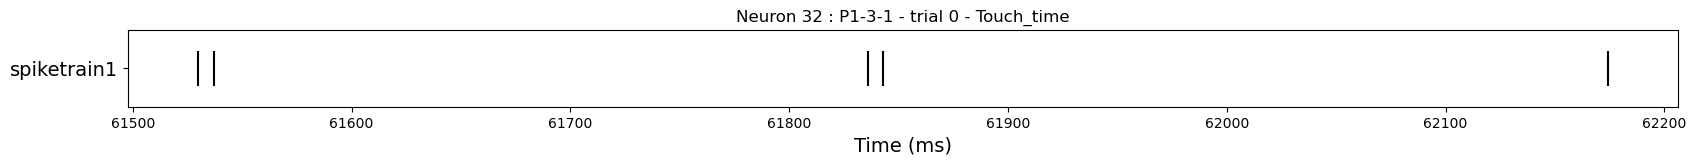

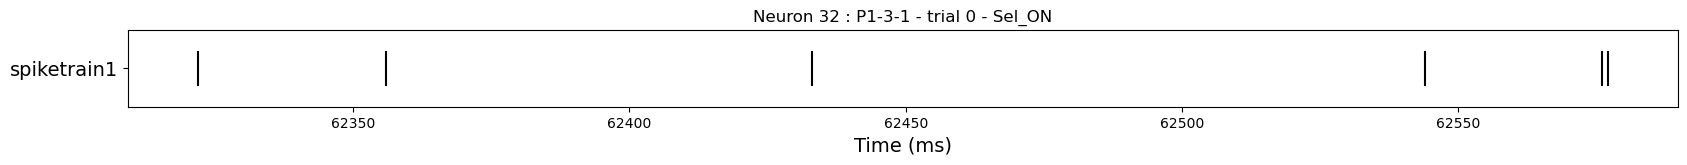

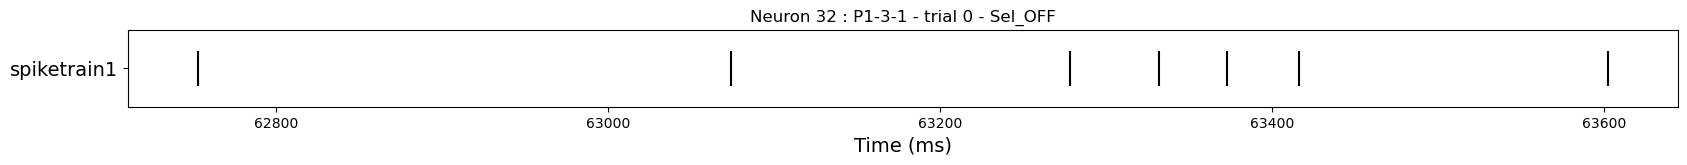

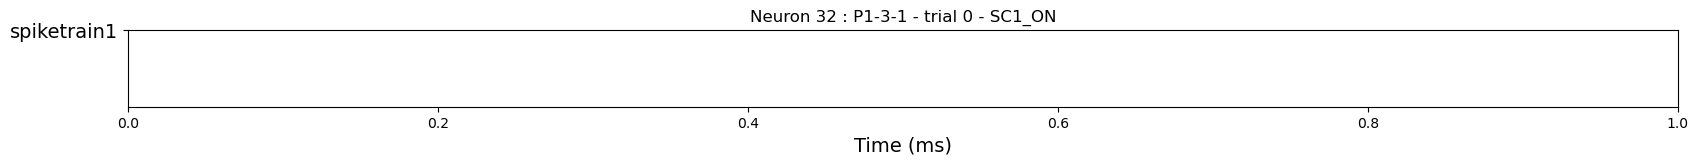

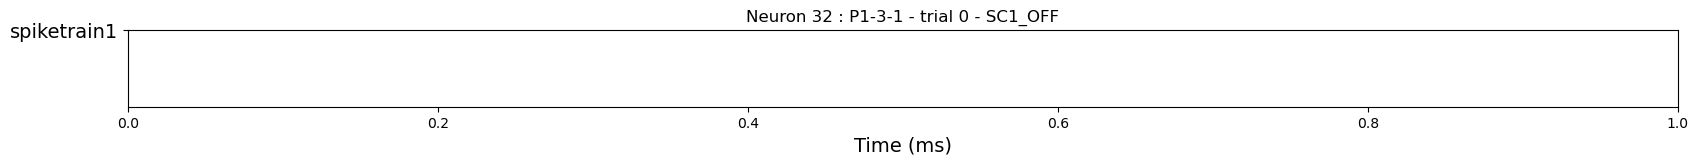

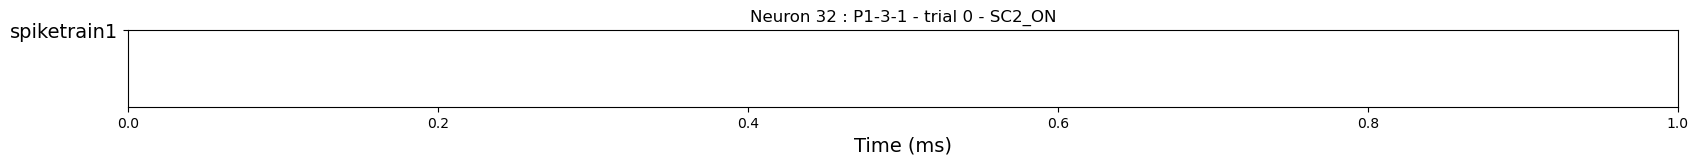

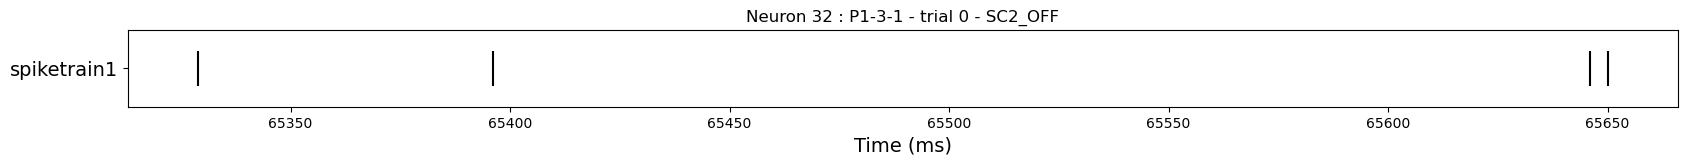

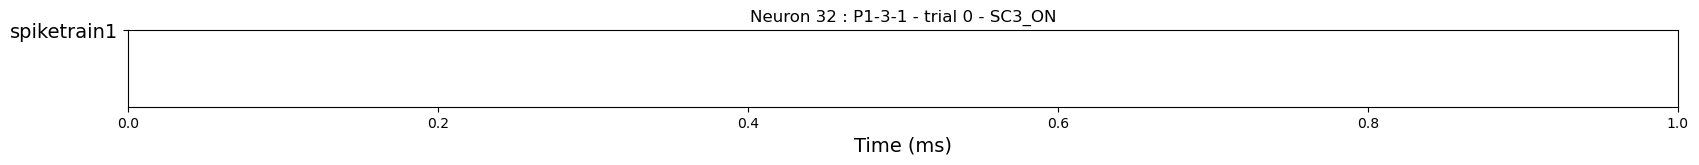

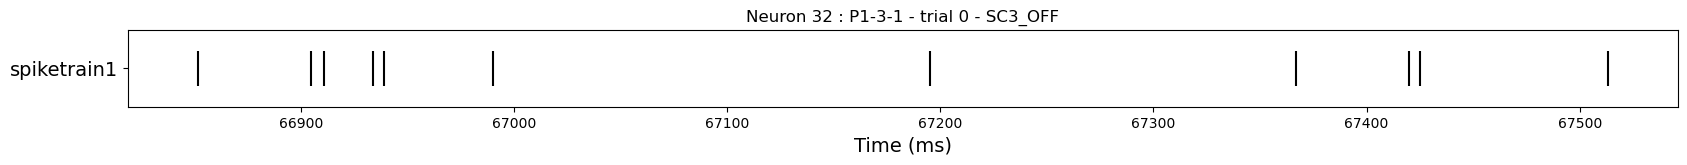

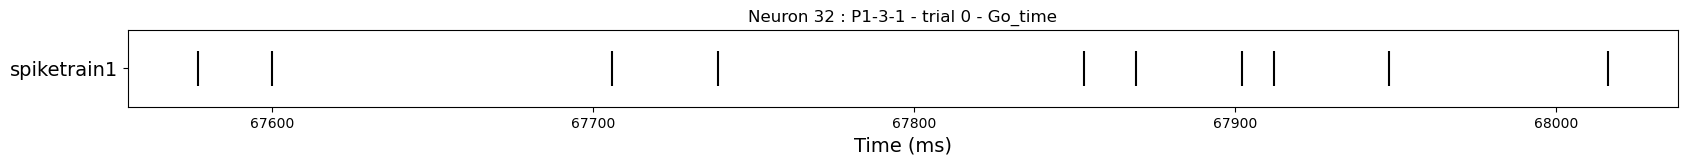

In [30]:
import matplotlib.pyplot as plt 

trial = 0
neuron = 32

for i in range(len(event_labels) - 1): 
    spiketrain = list_spike_train[i][neuron][trial]
    #x_axis = np.arange(df_task_ts_by_neuron[neuron][1].loc[trial][i], df_task_ts_by_neuron[neuron][1].loc[trial][i+1])

    plt.figure(figsize=(20, 1))
    plt.eventplot(spiketrain.magnitude, linelengths=0.75, color='black')
    #plt.xticks(np.arange(spiketrain.t_start, spiketrain.t_stop))

    plt.xlabel('Time (ms)', fontsize=14)
    plt.yticks([1], labels=["spiketrain1"], fontsize=14)
    plt.title(f"Neuron {neuron} : {unit_label[neuron]} - trial {trial} - {event_labels[i]}");

# Classify

## Firing rate 

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


In [102]:
# Build pipeline
n_splits = 50
# Cross-validation scheme
cvs0 = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)
scaler = StandardScaler()
estimator = LogisticRegression(C = 0.5, random_state=0, max_iter = 500)
clf = make_pipeline(scaler, estimator)

In [103]:
def struct_dataset(df_feature, target, measure):
    
    if measure == 'sync' or 'traj':
        cols_to_drop = list(df_feature.columns[0:5])
    else:
        cols_to_drop = list(df_feature.columns[0:4])

    data = df_feature.drop(columns=cols_to_drop)
    target = pd.DataFrame(target, dtype='uint8')


    return data, target

In [104]:
class Model_info:

    def __init__(self, n_splits, n_events, data, target, cvs, clf):
        self.n_splits = n_splits
        self.n_periods = n_events
        self.data = data
        self.target = target
        self.cvs = cvs
        self.clf = clf

### P1/P2

In [46]:
n_events = len(event_labels) - 1

list_data_sync = []
list_target_sync = []
list_sync_model = []

list_data_rate = []
list_target_rate = []
list_rate_model = []

for event in range(n_events):
    
    list_df_spk[event] = list_df_spk[event].fillna(0)

    data_rate, target_rate = struct_dataset(\
        list_df_spk[event], target, measure ='rate')

    model_rate = Model_info(n_splits,\
             n_events, data_rate, target_rate, cvs0, clf)

    list_data_rate.append(data_rate)
    list_target_rate.append(target_rate)
    list_rate_model.append(model_rate)

In [113]:
def classif_rate(list_model, periods_names, probe):

    #acc = np.zeros(list_model[0][0].n_splits)
    #acc_shuf = np.zeros(list_model[0][0].n_splits)
    acc_df = pd.DataFrame(\
        columns=['split', 'data_type', 'period', 'probe', 'target_type', 'accuracy', 'y_true', 'y_pred'])

 
    model_ = list_model[0]
    data_ = list_model[0].data
    target_ = list_model[0].target
    n_periods = list_model[0].n_periods
    n_targets = list_model[0].target.shape[1]


    for i_split, (train_ind, test_ind) in enumerate(model_.cvs.split(data_,target_)):

        print('#################')
        print('SPLIT :', i_split)
        print('##################')
        
        for per_idx in range(n_periods):
    
    
            model = list_model[per_idx]
            data = model.data

            for idx_target in range(n_targets):
                

                target_ =  model.target.iloc[:,idx_target]
                target_name = model.target.columns[idx_target]

                #print(periods_names[per_idx], sigma[sig_indx], target_name)

                # train classifier 
                model.clf.fit(data.loc[train_ind,:], target_.loc[train_ind])
            
                # test classifier 
                y_pred =  model.clf.predict(data.loc[test_ind,:])
                y_true = target_.loc[test_ind].values
                
                acc = accuracy_score(y_true, y_pred)
                
                
                # save test perfomance
                d = {
                    'split' : [i_split],
                    'data_type': ['test'],
                    'period': [f'{periods_names[per_idx]}'],
                    'target_type' : target_name, 
                    'probe' : probe, 
                    'accuracy': [acc],
                    'y_true' : [y_true],
                    'y_pred': [y_pred]
                    }

                acc_df = pd.concat((acc_df, pd.DataFrame(data=d)), ignore_index=True)
            
                #  train classfier on shuffled data
                ind_train_shuf = np.random.permutation(train_ind)
                model.clf.fit(data.loc[train_ind,:],  target_.loc[ind_train_shuf])
            
                # test classfier on shuffled data
                y_pred_shuf =  model.clf.predict(data.loc[test_ind,:])
                acc_shuf = accuracy_score(y_true, y_pred_shuf)
                
                # save shuffled perfomance
                d_shuff = {
                    'split' : [i_split],
                    'data_type': ['shuff'],
                    'period': [f'{periods_names[per_idx]}'],
                    'target_type' : target_name,
                    'probe' : probe, 
                    'accuracy': [acc_shuf],
                    'y_true' : [y_true],
                    'y_pred': [y_pred_shuf]
                    }
            
                acc_df = pd.concat((acc_df, pd.DataFrame(data=d_shuff)), ignore_index=True)

    return acc_df


In [48]:
list_rate_model[0].data

P1-6-1 P2-24-1             P1-19-1             P1-17-1  \
0                     0       0   5.571030640668524   2.785515320334262   
1                     0       0   10.79136690647482   4.496402877697841   
2                     0       0  15.051740357478835  12.229539040451552   
3                     0       0  12.081784386617102  6.5055762081784385   
4                     0       0   9.285051067780872   7.428040854224698   
..                  ...     ...                 ...                 ...   
171   2.806361085126286       0                   0                   0   
172                 0.0       0                   0                   0   
173  2.6833631484794274       0                   0                   0   
174                 0.0       0                   0                   0   
175   1.863932898415657       0                   0                   0   

                P1-12-1 P2-7-4 P2-14-1              P2-9-3 P1-1-1  \
0     38.99721448467967      0       0   2.785515320334262      0   
1     37.76978417266187      0       0  1.7985611510791368      0   
2     39.51081843838194      0       0  2.8222013170272815      0   
3    34.386617100371744      0       0  2.7881040892193307      0   
4     26.92664809656453      0       0    6.49953574744661      0   
..                  ...    ...     ...                 ...    ...   
171                   0      0       0                   0      0   
172                   0      0       0                   0      0   
173                   0      0       0                   0      0   
174                   0      0       0                   0      0   
175                   0      0       0                   0      0   

                P2-23-1  ...             P2-20-1             P2-11-1 P2-21-2  \
0     2.785515320334262  ...  1.8570102135561746   3.714020427112349       0   
1     2.697841726618705  ...  1.7985611510791368                 0.0       0   
2     19.75540921919097  ...  15.992474129821261  14.111006585136407       0   
3    15.799256505576206  ...    9.29368029739777  16.728624535315983       0   
4     12.99907149489322  ...  24.141132776230272    6.49953574744661       0   
..                  ...  ...                 ...                 ...     ...   
171                   0  ...                   0                   0       0   
172                   0  ...                   0                   0       0   
173                   0  ...                   0                   0       0   
174                   0  ...                   0                   0       0   
175                   0  ...                   0                   0       0   

    P2-17-1              P1-8-1 P2-6-1             P2-11-2  \
0         0                   0      0                   0   
1         0                   0      0                   0   
2         0                   0      0                   0   
3         0                   0      0                   0   
4         0                   0      0                   0   
..      ...                 ...    ...                 ...   
171       0   7.483629560336763      0  1.8709073900841908   
172       0   8.442776735459663      0   9.380863039399626   
173       0  11.627906976744185      0  0.8944543828264758   
174       0   6.554307116104869      0  0.9363295880149812   
175       0   6.523765144454799      0   3.727865796831314   

                 P1-7-1             P1-14-1             P1-23-2  
0                     0  11.142061281337048                 0.0  
1                     0  12.589928057553957  1.7985611510791368  
2                     0  15.992474129821261  2.8222013170272815  
3                     0  10.223048327137546   0.929368029739777  
4                     0  11.142061281337048  1.8570102135561746  
..                  ...                 ...                 ...  
171   4.677268475210477                   0                   0  
172  0.9380863039399625                   0          

In [49]:
#periods_names = list(task_info.keys())
probe = 'P1/P2'
acc_df_Twoprobes = classif_rate(list_rate_model, event_labels, probe=probe)
list_acc = [acc_df_Twoprobes]
acc_df_Twoprobes.head()
#acc_df.to_csv('acc_df_merged_{session}.csv')

#################
SPLIT : 0
##################
#################
SPLIT : 1
##################
#################
SPLIT : 2
##################
#################
SPLIT : 3
##################
#################
SPLIT : 4
##################
#################
SPLIT : 5
##################
#################
SPLIT : 6
##################
#################
SPLIT : 7
##################
#################
SPLIT : 8
##################
#################
SPLIT : 9
##################
#################
SPLIT : 10
##################
#################
SPLIT : 11
##################
#################
SPLIT : 12
##################
#################
SPLIT : 13
##################
#################
SPLIT : 14
##################
#################
SPLIT : 15
##################
#################
SPLIT : 16
##################
#################
SPLIT : 17
##################
#################
SPLIT : 18
##################
#################
SPLIT : 19
##################
#################
SPLIT : 20
##################
##

split data_type      period  probe   target_type  accuracy  \
0     0      test  Touch_time  P1/P2    trial_type  0.694444   
1     0     shuff  Touch_time  P1/P2    trial_type  0.250000   
2     0      test  Touch_time  P1/P2      position  0.500000   
3     0     shuff  Touch_time  P1/P2      position  0.277778   
4     0      test  Touch_time  P1/P2  type_and_pos  0.250000   

                                              y_true  \
0  [1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 1, 3, ...   
1  [1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 1, 3, ...   
2  [2, 2, 2, 2, 4, 4, 3, 4, 4, 3, 4, 3, 3, 2, 3, ...   
3  [2, 2, 2, 2, 4, 4, 3, 4, 4, 3, 4, 3, 3, 2, 3, ...   
4  [0, 6, 0, 3, 5, 2, 4, 5, 8, 4, 8, 4, 7, 0, 7, ...   

                                              y_pred  
0  [1, 3, 1, 2, 2, 1, 2, 1, 3, 2, 2, 2, 3, 1, 3, ...  
1  [2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 3, 3, 1, ...  
2  [4, 2, 2, 2, 4, 4, 2, 3, 2, 2, 2, 4, 3, 2, 4, ...  
3  [2, 3, 4, 2, 4, 2, 4, 3, 3, 2, 4, 3, 2, 2, 4, ...  
4  [2, 0, 2, 3, 5, 2, 4, 2, 8, 4, 3, 5, 7, 2, 8, ...

### P1

In [50]:
n_events = len(event_labels) - 1

list_data_sync = []
list_target_sync = []
list_sync_model = []
list_data_rate = []
list_target_rate = []
list_rate_model = []

for event in range(n_events):
    
    list_data_sync.append([])
    list_target_sync.append([])
    list_sync_model.append([])

    list_df_spk_P1 = list_df_spk[event].drop(columns=unit_labelProbe2, inplace=False).fillna(0)


    data_rate, target_rate = struct_dataset(\
        list_df_spk_P1, target, measure ='rate')

    model_rate = Model_info(n_splits,\
             n_events, data_rate, target_rate, cvs0, clf)

    list_data_rate.append(data_rate)
    list_target_rate.append(target_rate)
    list_rate_model.append(model_rate)

In [51]:
list_rate_model[2].data

P1-6-1             P1-19-1             P1-17-1  \
0                     0   6.993006993006993   0.999000999000999   
1                     0  13.986013986013987  12.987012987012989   
2                     0  14.534883720930232  15.503875968992247   
3                     0  22.954091816367264  14.970059880239521   
4                     0   10.02004008016032  17.034068136272545   
..                  ...                 ...                 ...   
171   2.997002997002997                   0                   0   
172                 0.0                   0                   0   
173   0.999000999000999                   0                   0   
174  2.9940119760479043                   0                   0   
175   0.998003992015968                   0                   0   

                P1-12-1 P1-1-1              P1-5-1             P1-13-1  \
0     8.991008991008991      0                   0  10.989010989010989   
1    17.982017982017982      0                   0  14.985014985014987   
2    16.472868217054266      0                   0  18.410852713178297   
3    11.976047904191617      0                   0   3.992015968063872   
4    11.022044088176353      0                   0   4.008016032064128   
..                  ...    ...                 ...                 ...   
171                   0      0   4.995004995004995                   0   
172                   0      0   3.996003996003996                   0   
173                   0      0  14.985014985014987                   0   
174                   0      0  5.9880239520958085                   0   
175                   0      0   7.984031936127744                   0   

    P1-11-3              P1-4-1              P1-1-2 P1-11-1  \
0         0   5.994005994005994                   0       0   
1         0   6.993006993006993                   0       0   
2         0   10.65891472868217                   0       0   
3         0  2.9940119760479043                   0       0   
4         0  12.024048096192384                   0       0   
..      ...                 ...                 ...     ...   
171       0                   0  10.989010989010989       0   
172       0                   0   0.999000999000999       0   
173       0                   0  17.982017982017982       0   
174       0                   0  25.948103792415168       0   
175       0                   0  21.956087824351297       0   

               P1-11-2             P1-18-1              P1-2-1  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
..                 ...                 ...                 ...   
171  4.995004995004995   5.994005994005994  11.988011988011989   
172  0.999000999000999  10.989010989010989   1.998001998001998   
173  3.996003996003996   3.996003996003996  11.988011988011989   
174  6.986027944111776   7.984031936127744  10.978043912175648   
175  3.992015968063872   4.990019960079841   0.998003992015968   

                P1-22-2              P1-3-1              P1-8-1  \
0                     0   6.993006993006993                   0   
1                     0  14.985014985014987                   0   
2                     0   9.689922480620154                   0   
3                     0   16.96606786427146                   0   
4                     0  23.046092184368735                   0   
..                  ...                 ...                 ...   
171   1.998001998001998   2.997002997002997  15.984015984015985   
172   2.997002997002997   0.999000999000999   1.998001998001998   
173   0.999000999000999   4.995004995004995  13.986013986013987   
174  2.9940119760479043   4.990019960079841   8.982035928143713   
175   0.998003992015968   0.99800399

In [52]:
#periods_names = list(task_info.keys())
probe = 'P1'
acc_df_P1 = classif_rate(list_rate_model, event_labels, probe=probe)
list_acc.append(acc_df_P1)
acc_df_P1.head()
#acc_df.to_csv('acc_df_merged_{session}.csv')

#################
SPLIT : 0
##################
#################
SPLIT : 1
##################
#################
SPLIT : 2
##################
#################
SPLIT : 3
##################
#################
SPLIT : 4
##################
#################
SPLIT : 5
##################
#################
SPLIT : 6
##################
#################
SPLIT : 7
##################
#################
SPLIT : 8
##################
#################
SPLIT : 9
##################
#################
SPLIT : 10
##################
#################
SPLIT : 11
##################
#################
SPLIT : 12
##################
#################
SPLIT : 13
##################
#################
SPLIT : 14
##################
#################
SPLIT : 15
##################
#################
SPLIT : 16
##################
#################
SPLIT : 17
##################
#################
SPLIT : 18
##################
#################
SPLIT : 19
##################
#################
SPLIT : 20
##################
##

split data_type      period probe   target_type  accuracy  \
0     0      test  Touch_time    P1    trial_type  0.500000   
1     0     shuff  Touch_time    P1    trial_type  0.444444   
2     0      test  Touch_time    P1      position  0.083333   
3     0     shuff  Touch_time    P1      position  0.277778   
4     0      test  Touch_time    P1  type_and_pos  0.194444   

                                              y_true  \
0  [1, 1, 2, 1, 2, 2, 1, 2, 3, 3, 3, 1, 2, 3, 1, ...   
1  [1, 1, 2, 1, 2, 2, 1, 2, 3, 3, 3, 1, 2, 3, 1, ...   
2  [4, 2, 3, 2, 3, 2, 4, 2, 2, 3, 4, 3, 3, 3, 2, ...   
3  [4, 2, 3, 2, 3, 2, 4, 2, 2, 3, 4, 3, 3, 3, 2, ...   
4  [2, 0, 4, 0, 4, 3, 2, 3, 6, 7, 8, 1, 4, 7, 0, ...   

                                              y_pred  
0  [1, 3, 1, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 3, 1, ...  
1  [3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, ...  
2  [2, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 2, 3, 4, 3, ...  
3  [3, 4, 2, 3, 2, 2, 3, 4, 2, 2, 4, 2, 4, 2, 4, ...  
4  [1, 8, 0, 1, 2, 3, 1, 0, 6, 2, 7, 2, 1, 5, 3, ...

### P2

In [53]:
n_events = len(event_labels) - 1

list_data_sync = []
list_target_sync = []
list_sync_model = []
list_data_rate = []
list_target_rate = []
list_rate_model = []

for event in range(n_events):
    
    list_data_sync.append([])
    list_target_sync.append([])
    list_sync_model.append([])

    list_df_spk_P2 = list_df_spk[event].drop(columns=unit_labelProbe1, inplace=False).fillna(0)

    data_rate, target_rate = struct_dataset(\
        list_df_spk_P2, target, measure ='rate')

    model_rate = Model_info(n_splits,\
             n_events, data_rate, target_rate, cvs0, clf)

    list_data_rate.append(data_rate)
    list_target_rate.append(target_rate)
    list_rate_model.append(model_rate)

In [54]:
list_rate_model[5].data

P2-24-1 P2-7-4 P2-14-1             P2-9-3             P2-23-1  \
0         0      0       0  6.230529595015576   9.345794392523365   
1         0      0       0  6.514657980456026  16.286644951140065   
2         0      0       0                0.0   9.771986970684038   
3         0      0       0               6.25               9.375   
4         0      0       0                0.0   3.257328990228013   
..      ...    ...     ...                ...                 ...   
171       0      0       0                  0                   0   
172       0      0       0                  0                   0   
173       0      0       0                  0                   0   
174       0      0       0                  0                   0   
175       0      0       0                  0                   0   

                P2-19-1             P2-8-1 P2-21-1             P2-10-1  \
0                     0  46.72897196261682       0                   0   
1                     0  42.34527687296417       0                   0   
2                     0  39.08794788273615       0                   0   
3                     0              43.75       0                   0   
4                     0  35.83061889250815       0                   0   
..                  ...                ...     ...                 ...   
171   3.257328990228013                  0       0   3.257328990228013   
172                 0.0                  0       0                 0.0   
173               9.375                  0       0              28.125   
174   3.257328990228013                  0       0   3.257328990228013   
175  12.461059190031152                  0       0  21.806853582554517   

                 P2-9-1  ...              P2-7-3              P2-1-2  \
0    31.152647975077883  ...                   0                   0   
1    16.286644951140065  ...                   0                   0   
2     9.771986970684038  ...                   0                   0   
3                  6.25  ...                   0                   0   
4     22.80130293159609  ...                   0                   0   
..                  ...  ...                 ...                 ...   
171                   0  ...   39.08794788273615   22.80130293159609   
172                   0  ...    48.8599348534202   22.80130293159609   
173                   0  ...              40.625                6.25   
174                   0  ...   45.60260586319218  19.543973941368076   
175                   0  ...  59.190031152647975   18.69158878504673   

                P2-23-2 P2-15-1             P2-20-1             P2-11-1  \
0                     0       0                 0.0                 0.0   
1                     0       0   3.257328990228013  26.058631921824105   
2                     0       0   3.257328990228013  13.029315960912053   
3                     0       0                 0.0                6.25   
4                     0       0  13.029315960912053   22.80130293159609   
..                  ...     ...                 ...                 ...   
171                 0.0       0                   0                   0   
172  13.029315960912053       0                   0                   0   
173               3.125       0                   0                   0   
174   3.257328990228013       0                   0                   0   
175   18.69158878504673       0                   0                   0   

    P2-21-2 P2-17-1 P2-6-1             P2-11-2  
0         0       0      0                   0  
1         0       0      0                   0  
2         0       0      0                   0  
3         0       0      0                   0  
4         0       0      0                   0  
..      ...     ...    ...                 ...  
171       0       0      0   6.514657980456026  
172       0       0      0  13.029315960912053  
173       0       0      0               3.125  
174       0       0      0   6

In [55]:
#periods_names = list(task_info.keys())
probe = 'P2'
acc_df_P2 = classif_rate(list_rate_model, event_labels, probe=probe)
list_acc.append(acc_df_P2)

acc_df_P2.head()
#acc_df.to_csv('acc_df_merged_{session}.csv')

#################
SPLIT : 0
##################
#################
SPLIT : 1
##################
#################
SPLIT : 2
##################
#################
SPLIT : 3
##################
#################
SPLIT : 4
##################
#################
SPLIT : 5
##################
#################
SPLIT : 6
##################
#################
SPLIT : 7
##################
#################
SPLIT : 8
##################
#################
SPLIT : 9
##################
#################
SPLIT : 10
##################
#################
SPLIT : 11
##################
#################
SPLIT : 12
##################
#################
SPLIT : 13
##################
#################
SPLIT : 14
##################
#################
SPLIT : 15
##################
#################
SPLIT : 16
##################
#################
SPLIT : 17
##################
#################
SPLIT : 18
##################
#################
SPLIT : 19
##################
#################
SPLIT : 20
##################
##

split data_type      period probe   target_type  accuracy  \
0     0      test  Touch_time    P2    trial_type  0.611111   
1     0     shuff  Touch_time    P2    trial_type  0.361111   
2     0      test  Touch_time    P2      position  0.500000   
3     0     shuff  Touch_time    P2      position  0.277778   
4     0      test  Touch_time    P2  type_and_pos  0.250000   

                                              y_true  \
0  [1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3, 3, 1, ...   
1  [1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3, 3, 1, ...   
2  [3, 4, 3, 4, 2, 2, 2, 3, 4, 2, 4, 4, 4, 3, 4, ...   
3  [3, 4, 3, 4, 2, 2, 2, 3, 4, 2, 4, 4, 4, 3, 4, ...   
4  [1, 5, 7, 2, 0, 3, 0, 1, 2, 3, 8, 8, 8, 7, 2, ...   

                                              y_pred  
0  [1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 3, 3, 3, 1, 2, ...  
1  [2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, ...  
2  [4, 2, 3, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, ...  
3  [2, 4, 2, 3, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 3, ...  
4  [2, 5, 2, 1, 2, 3, 2, 0, 2, 6, 6, 8, 8, 2, 3, ...

In [48]:
acc_df = pd.concat(list_acc)
acc_df.to_csv(f'/home/laurie/Bureau/pattern_classification/results/classif_new_data/{session}_LogReg_rate.csv')
acc_df

split data_type      period  probe   target_type  accuracy  \
0        0      test  Touch_time  P1/P2    trial_type  0.694444   
1        0     shuff  Touch_time  P1/P2    trial_type  0.388889   
2        0      test  Touch_time  P1/P2      position  0.361111   
3        0     shuff  Touch_time  P1/P2      position  0.416667   
4        0      test  Touch_time  P1/P2  type_and_pos  0.138889   
...    ...       ...         ...    ...           ...       ...   
1795    49     shuff     Go_time     P2    trial_type  0.416667   
1796    49      test     Go_time     P2      position  0.694444   
1797    49     shuff     Go_time     P2      position  0.361111   
1798    49      test     Go_time     P2  type_and_pos  0.250000   
1799    49     shuff     Go_time     P2  type_and_pos  0.250000   

                                                 y_true  \
0     [2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, ...   
1     [2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, ...   
2     [2, 3, 4, 2, 3, 4, 4, 2, 3, 3, 2, 3, 2, 4, 3, ...   
3     [2, 3, 4, 2, 3, 4, 4, 2, 3, 3, 2, 3, 2, 4, 3, ...   
4     [3, 4, 8, 0, 4, 5, 2, 0, 7, 1, 6, 1, 6, 8, 1, ...   
...                                                 ...   
1795  [2, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 3, ...   
1796  [4, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 2, 2, 4, 3, ...   
1797  [4, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 2, 2, 4, 3, ...   
1798  [5, 1, 1, 8, 4, 1, 3, 5, 3, 6, 4, 3, 0, 2, 7, ...   
1799  [5, 1, 1, 8, 4, 1, 3, 5, 3, 6, 4, 3, 0, 2, 7, ...   

                                                 y_pred  
0     [2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 1, ...  
1     [3, 1, 1, 3, 2, 3, 1, 2, 2, 2, 2, 3, 2, 1, 1, ...  
2     [3, 3, 4, 3, 4, 2, 2, 2, 4, 2, 3, 2, 4, 4, 4, ...  
3     [4, 2, 4, 3, 3, 2, 4, 2, 4, 2, 2, 3, 2, 2, 3, ...  
4     [5, 4, 8, 5, 5, 6, 0, 0, 8, 0, 1, 6, 8, 8, 2, ...  
...                                                 ...  
1795  [1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 3, 1, 1, ...  
1796  [4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 3, 2, 4, 4, 3, ...  
1797  [4, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 2, 4, ...  
1798  [2, 0, 2, 7, 2, 8, 5, 5, 4, 8, 1, 3, 0, 2, 7, ...  
1799  [5, 7, 0, 6, 5, 2, 4, 5, 1, 5, 5, 3, 2, 2, 4, ...  

[5400 rows x 8 columns]

# Plot

## Accuracy firing rate

In [49]:
list_acc[2]

split data_type      period probe   target_type  accuracy  \
0        0      test  Touch_time    P2    trial_type  0.444444   
1        0     shuff  Touch_time    P2    trial_type  0.222222   
2        0      test  Touch_time    P2      position  0.333333   
3        0     shuff  Touch_time    P2      position  0.416667   
4        0      test  Touch_time    P2  type_and_pos  0.111111   
...    ...       ...         ...   ...           ...       ...   
1795    49     shuff     Go_time    P2    trial_type  0.416667   
1796    49      test     Go_time    P2      position  0.694444   
1797    49     shuff     Go_time    P2      position  0.361111   
1798    49      test     Go_time    P2  type_and_pos  0.250000   
1799    49     shuff     Go_time    P2  type_and_pos  0.250000   

                                                 y_true  \
0     [3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 2, 1, 2, 3, 1, ...   
1     [3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 2, 1, 2, 3, 1, ...   
2     [3, 4, 3, 3, 4, 4, 2, 3, 2, 4, 2, 3, 2, 4, 4, ...   
3     [3, 4, 3, 3, 4, 4, 2, 3, 2, 4, 2, 3, 2, 4, 4, ...   
4     [7, 5, 1, 4, 2, 8, 0, 1, 0, 8, 3, 1, 3, 8, 2, ...   
...                                                 ...   
1795  [2, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 3, ...   
1796  [4, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 2, 2, 4, 3, ...   
1797  [4, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 2, 2, 4, 3, ...   
1798  [5, 1, 1, 8, 4, 1, 3, 5, 3, 6, 4, 3, 0, 2, 7, ...   
1799  [5, 1, 1, 8, 4, 1, 3, 5, 3, 6, 4, 3, 0, 2, 7, ...   

                                                 y_pred  
0     [1, 2, 2, 1, 3, 3, 2, 2, 1, 2, 2, 1, 1, 3, 1, ...  
1     [1, 1, 2, 1, 3, 2, 2, 3, 3, 3, 1, 1, 3, 1, 3, ...  
2     [3, 3, 4, 3, 2, 4, 3, 4, 3, 2, 2, 2, 4, 4, 2, ...  
3     [3, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 4, 4, 2, 2, ...  
4     [2, 4, 5, 3, 6, 8, 4, 5, 2, 0, 6, 0, 1, 7, 1, ...  
...                                                 ...  
1795  [1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 3, 1, 1, ...  
1796  [4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 3, 2, 4, 4, 3, ...  
1797  [4, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 2, 4, ...  
1798  [2, 0, 2, 7, 2, 8, 5, 5, 4, 8, 1, 3, 0, 2, 7, ...  
1799  [5, 7, 0, 6, 5, 2, 4, 5, 1, 5, 5, 3, 2, 2, 4, ...  

[1800 rows x 8 columns]

In [56]:
acc_df = pd.concat(list_acc)

In [57]:
acc_df

split data_type      period  probe   target_type  accuracy  \
0        0      test  Touch_time  P1/P2    trial_type  0.694444   
1        0     shuff  Touch_time  P1/P2    trial_type  0.250000   
2        0      test  Touch_time  P1/P2      position  0.500000   
3        0     shuff  Touch_time  P1/P2      position  0.277778   
4        0      test  Touch_time  P1/P2  type_and_pos  0.250000   
...    ...       ...         ...    ...           ...       ...   
2995    49     shuff     Go_time     P2    trial_type  0.388889   
2996    49      test     Go_time     P2      position  0.611111   
2997    49     shuff     Go_time     P2      position  0.500000   
2998    49      test     Go_time     P2  type_and_pos  0.361111   
2999    49     shuff     Go_time     P2  type_and_pos  0.166667   

                                                 y_true  \
0     [1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 1, 3, ...   
1     [1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 1, 3, ...   
2     [2, 2, 2, 2, 4, 4, 3, 4, 4, 3, 4, 3, 3, 2, 3, ...   
3     [2, 2, 2, 2, 4, 4, 3, 4, 4, 3, 4, 3, 3, 2, 3, ...   
4     [0, 6, 0, 3, 5, 2, 4, 5, 8, 4, 8, 4, 7, 0, 7, ...   
...                                                 ...   
2995  [1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 2, 1, 2, ...   
2996  [2, 4, 2, 3, 2, 3, 4, 2, 2, 3, 3, 2, 2, 4, 4, ...   
2997  [2, 4, 2, 3, 2, 3, 4, 2, 2, 3, 3, 2, 2, 4, 4, ...   
2998  [0, 5, 6, 1, 0, 1, 8, 3, 0, 1, 4, 6, 3, 2, 5, ...   
2999  [0, 5, 6, 1, 0, 1, 8, 3, 0, 1, 4, 6, 3, 2, 5, ...   

                                                 y_pred  
0     [1, 3, 1, 2, 2, 1, 2, 1, 3, 2, 2, 2, 3, 1, 3, ...  
1     [2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 3, 3, 1, ...  
2     [4, 2, 2, 2, 4, 4, 2, 3, 2, 2, 2, 4, 3, 2, 4, ...  
3     [2, 3, 4, 2, 4, 2, 4, 3, 3, 2, 4, 3, 2, 2, 4, ...  
4     [2, 0, 2, 3, 5, 2, 4, 2, 8, 4, 3, 5, 7, 2, 8, ...  
...                                                 ...  
2995  [1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, ...  
2996  [3, 3, 2, 3, 3, 3, 4, 2, 2, 3, 4, 4, 2, 4, 4, ...  
2997  [4, 4, 3, 2, 4, 3, 4, 2, 2, 4, 3, 2, 2, 3, 3, ...  
2998  [7, 1, 2, 0, 1, 1, 7, 3, 1, 4, 2, 8, 3, 5, 5, ...  
2999  [3, 3, 3, 2, 0, 3, 0, 4, 4, 8, 8, 8, 1, 2, 8, ...  

[9000 rows x 8 columns]

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

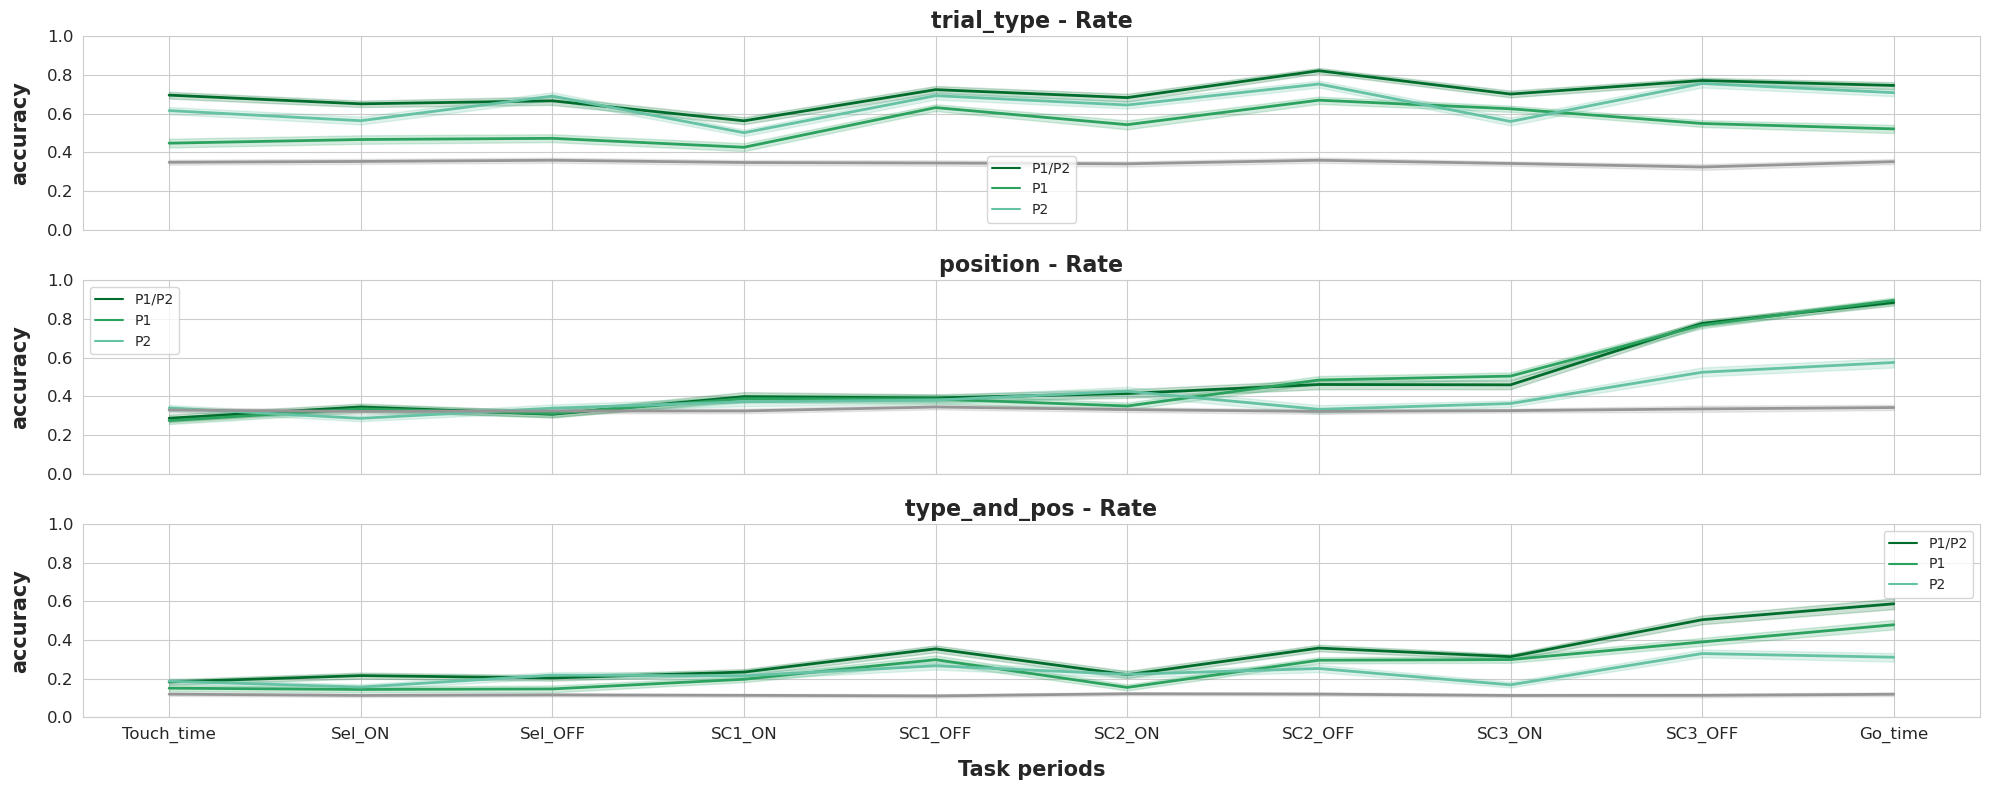

In [61]:
#acc_df = pd.concat(list_acc)
spk_accuracy = acc_df
target_list = ['trial_type', 'position', 'type_and_pos']

palette_prob = ['#006d2c', '#2ca25f', '#66c2a4']
palette_spk = ['#31a354', '#969696']



plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.labelpad"] = 12
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12 

fig, axs = plt.subplots(3, 1, figsize=(20, 8), sharex=True, sharey= True, dpi=100)  

#axs[0,0].set_ylabel('Type\n', fontsize=14, weight='bold')
#axs[1,0].set_ylabel('Position\n', fontsize=14, weight='bold')
#axs[2,0].set_ylabel('Type and position\n', fontsize=14, weight='bold')
legend_labels = []
legend_handles = []


for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy.rename(columns={"period": "Task periods", "score" : "accuracy"}, inplace=False)#\
    #.replace(to_replace = periods_names[:-2], value=['Touch', 'Selection Cue', 'Spatial Cue 1', 'Spatial Cue 2', 'Spatial Cue 3', 'Go'], inplace=False)\
    #.replace(to_replace=['test', 'shuff'], value=['test', 'shuffled'], inplace=False)
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', hue='probe', palette=palette_prob, linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=palette_spk[1], linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - Rate', fontsize= 16, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    

plt.tight_layout()

#time = datetime.now().strftime('%d_%m_%H_%M_%S')
#plt.savefig(f'/home/laurie/Bureau/pattern_classification/results/classif_new_data/{session}_LogReg_rate.png')

# Neural trajectory 

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

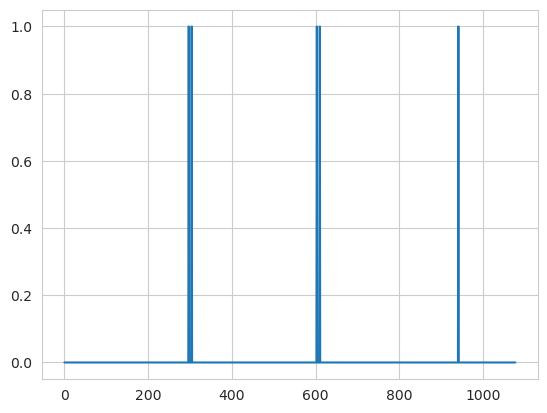

In [31]:
'''split the spike time vector by trial RUN WITH EVENT TIMES NOT ALIGNED'''

n_neurons = len(spike_times)
n_trials = df_task_ts.shape[0]
n_events = df_task_ts.shape[1] - 1 

len_times = np.zeros((n_trials, n_events), dtype=int)
spikes_binarized = np.zeros((n_neurons, n_trials, n_events), dtype=object)

for unit_idx in range(n_neurons):
    data = df_task_ts_by_neuron[unit_idx][1]
    trial_unit = data.shape[0]

    for idx_trial in range(trial_unit):
        trial_ref = data.loc[idx_trial]['idx_ref_trial']

        for i in range(n_events):
            # define the start and end time of each trial
            t_start = data.loc[idx_trial][i+1]
            t_stop = data.loc[idx_trial][i+2]

            # get spikes between start and end of trial and align to zero
            spk_tmp = spike_times[unit_idx][1]
            sel_spk = np.logical_and(spk_tmp>t_start, spk_tmp<t_stop)
            
            # get continuous spike trains
            n_times = (t_stop - t_start) + 1 
            spikes_bin = np.linspace(0, 0, num=n_times,  dtype=float)

            if unit_idx == completeUnit : 
                len_times[trial_ref][i] = n_times


            for spk in spk_tmp[sel_spk]:
                spk_aligned = spk - t_start
                spikes_bin[spk_aligned] = 1

            
            spikes_binarized[unit_idx][trial_ref][i] = {
                'unit_label': unit_label[unit_idx], 
                'trial_unit' : idx_trial, 
                'event' : event_labels[i],
                'spike_bin' : spikes_bin
                }
plt.plot(spikes_binarized[completeUnit][0][0]['spike_bin'])

In [32]:
import scipy.ndimage as spn 

sigma = [10]
n_sigma = len(sigma)
delta_time = 1
sigma_dt = sigma * delta_time 

spike_convolved = np.zeros((n_neurons, n_sigma, n_trials, n_events), dtype=object)

for unit_idx in range(n_units):
    #print('neuron : ', unit_idx)
    for trial in range(n_trials):
        #print(trial)
        for event in range(n_events):
            #print(event_labels[event])
            #print(spikes_binarized[unit_idx][trial][event])
            
            if spikes_binarized[unit_idx][trial][event] == 0 :
                spikes_bin = np.linspace(0, 0, num=len_times[trial][event],  dtype=int)
                #print(spikes_bin)

                spikes_binarized[unit_idx][trial][event] = {
                'unit_label': unit_label[unit_idx], 
                'trial_unit' : idx_trial, 
                'event' : event_labels[event],
                'spike_bin' : spikes_bin
                }
            
            #print(len_times[trial][event])
            #print(spikes_binarized[unit_idx][trial][event]['spike_bin'].shape)

            for s in range(n_sigma):
                scaling = sigma_dt[s] * np.sqrt(2*np.pi)
                smoothed_spk = spn.gaussian_filter1d(spikes_binarized[unit_idx][trial][event]['spike_bin'], sigma_dt[s]) * scaling
                spike_convolved[unit_idx][s][trial][event] = smoothed_spk

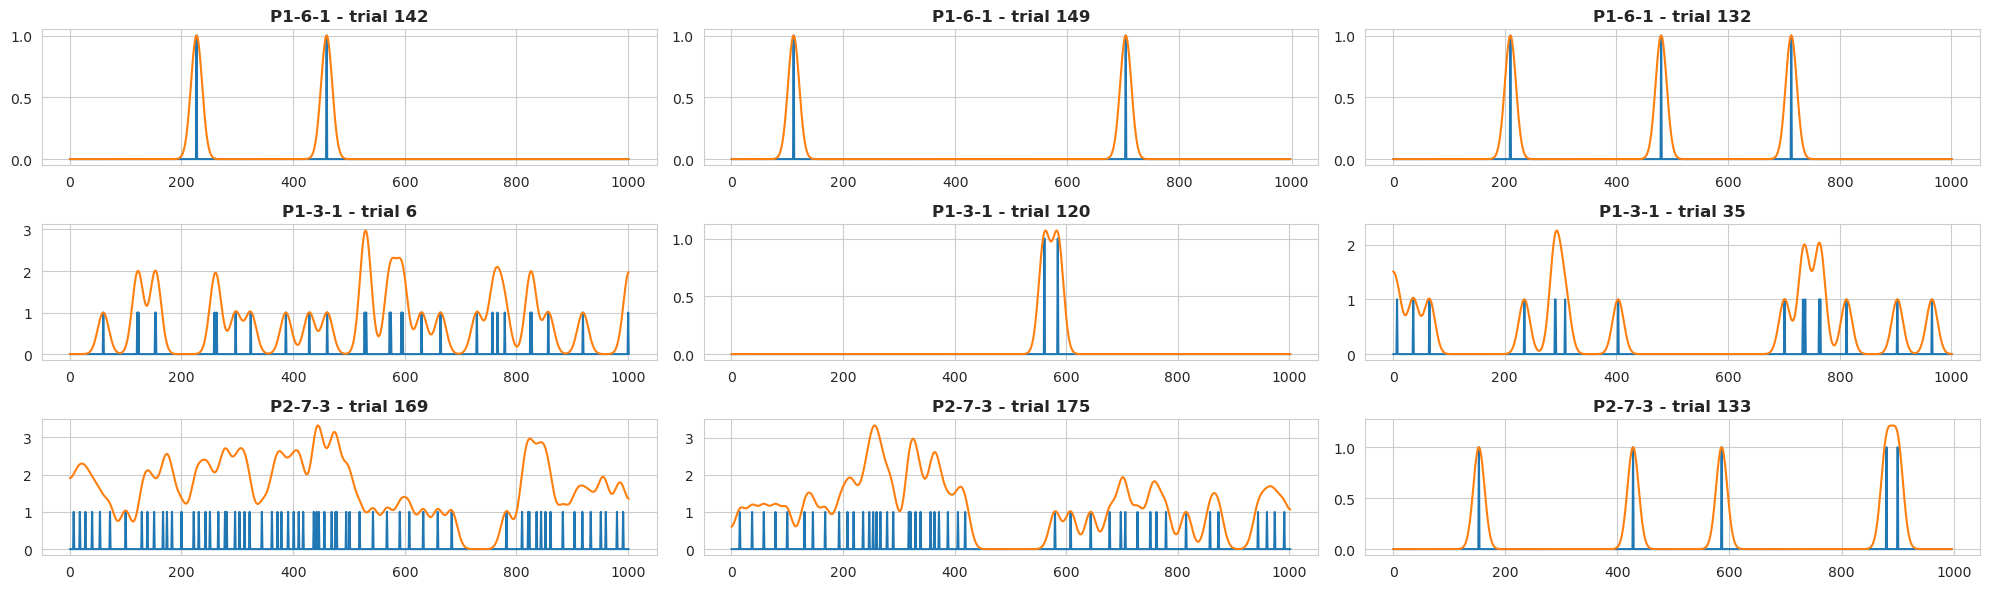

In [33]:
event = 2
sig = 0
unit_ = [0, 32, np.random.randint(0,n_units)]
fig, axs = plt.subplots(3,3, figsize=(20,6))

for i, unit_idx in enumerate(unit_):
    data = df_task_ts_by_neuron[unit_idx][1]
    n_trial_ = 3
    trials =  np.random.randint(0, data.shape[0], n_trial_)
    trials_ref = data.loc[trials]['idx_ref_trial'].to_list()

    for t, trial_idx in enumerate(trials_ref): 
        axs[i,t].plot(spikes_binarized[unit_idx][trial_idx][event]['spike_bin'])
        axs[i,t].plot(spike_convolved[unit_idx][sig][trial_idx][event])
        axs[i,t].set_title(f'{unit_label[unit_idx]} - trial {trial_idx}', fontsize=12, weight='bold')
    
    plt.tight_layout()

In [46]:
spike_convolved[completeUnit,0,0,0]

array([0., 0., 0., ..., 0., 0., 0.])

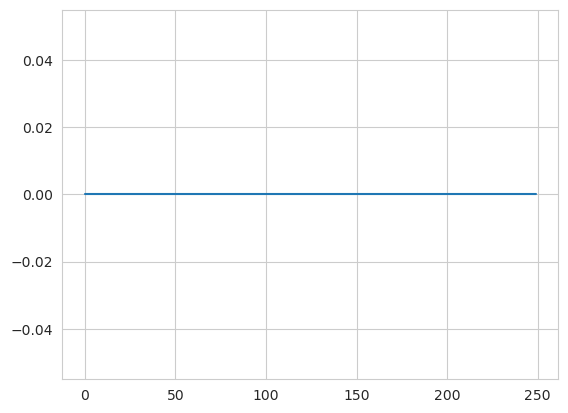

In [45]:
plt.plot(spike_convolved[completeUnit,0,0,0][ 0:250])

In [39]:
spike_convolved_sig1 = spike_convolved[:,0,:,:]
spike_convolved_sig1.shape

(43, 176, 10)

In [41]:
#neural_traj = np.zeros((n_sigma, n_trials, n_events), dtype=object)
neural_traj = np.concatenate(spike_convolved_sig1, axis=0)
neural_traj.shape

(7568, 10)

In [47]:
neural_traj = np.zeros((n_sigma, n_trials, n_events), dtype=object)

for s in range(n_sigma):
    for trial in range(n_trials):
            for event in range(n_events):
               neural_traj[s, trial, event] = np.hstack(spike_convolved[:,s,trial,event])


In [53]:
for t in range(10):
    for e in range(2):
        print(neural_traj[0, t, e].shape)

(46354,)
(13717,)
(47859,)
(14835,)
(45752,)
(13803,)
(46311,)
(13244,)
(46354,)
(13975,)
(47257,)
(13244,)
(46612,)
(13803,)
(46397,)
(13244,)
(45537,)
(13244,)
(45752,)
(13201,)


In [50]:
pd.DataFrame(neural_traj[0,:,0][:].flatten())

0
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
..                                                 ...
171  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
172  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
173  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
174  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
175  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[176 rows x 1 columns]

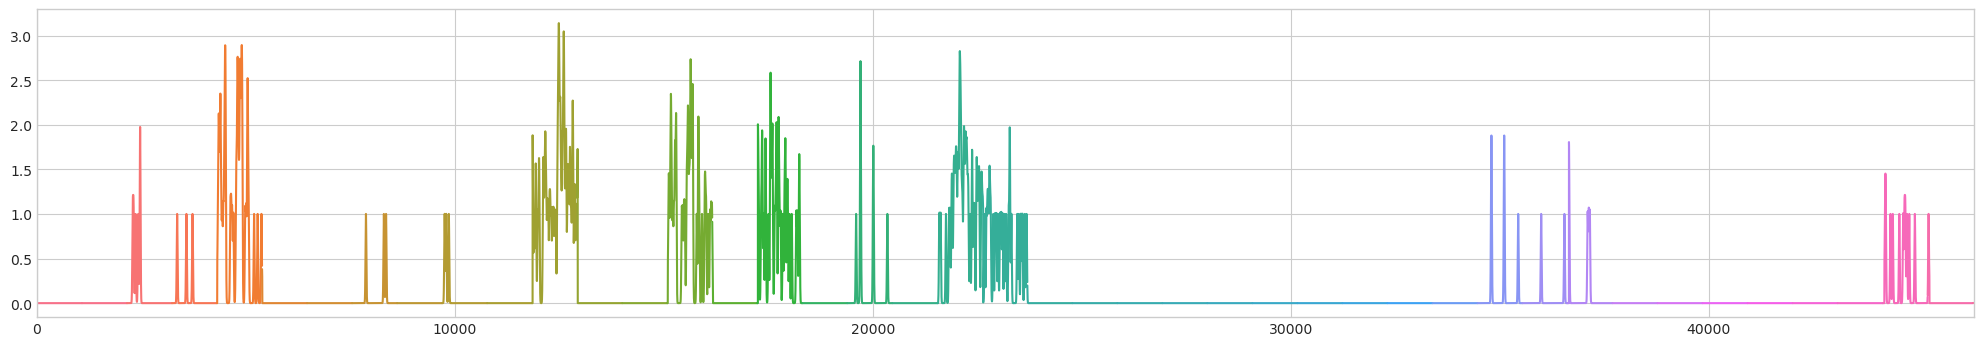

In [190]:
# plot population trajectory
sig = 0
trial = 0
event = 0
data = neural_traj[sig][trial][event]
unit = completeUnit
convol = spike_convolved[unit, sig, trial, event]
n_times = convol.shape[0] - 1



# Create a color palette with different colors every n_times points
palette = sns.color_palette("husl", n_colors=(data.shape[0] // n_times))

# Plot the population trajectory with seaborn
plt.figure(figsize=(25, 4))
for i in range(0, data.shape[0], n_times):
    color = palette[i // (n_times+1)]
    plt.plot(np.arange(i, min(i + n_times, data.shape[0])), data[i:min(i + n_times, data.shape[0])], color=color)

plt.xlim(0, data.shape[0])

# Show the plot
plt.show()


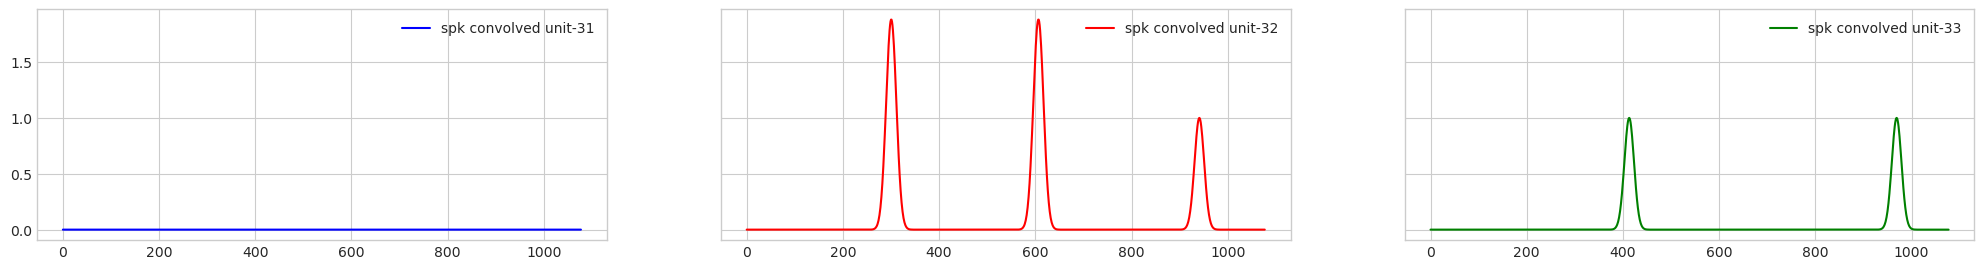

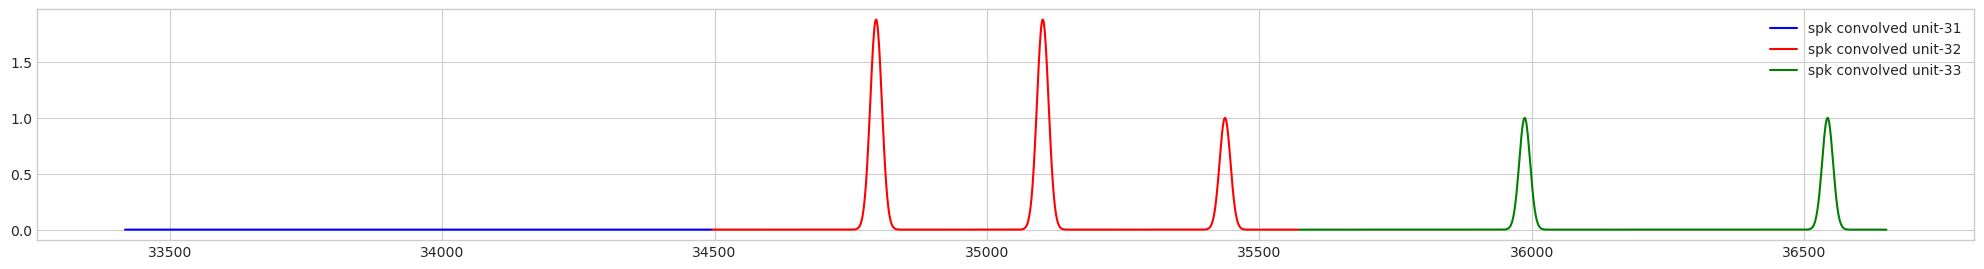

In [191]:
# verify spike convolved of unit == neural trajectory part coressponding to the unit

sig = 0
trial = 0
event = 0

fig, axs = plt.subplots(1, 3, figsize=(25,3), sharex=False, sharey=True)

unit = completeUnit - 1
convol = spike_convolved[unit,sig,trial,event]

axs[0].plot(convol,  color='b', label=f'spk convolved unit-{unit}')

unit = completeUnit
convol = spike_convolved[unit,sig,trial,event]
axs[1].plot(convol,  color='red', label=f'spk convolved unit-{unit}')

unit = completeUnit +1 
convol = spike_convolved[unit,sig,trial,event]
axs[2].plot(convol,  color='g', label=f'spk convolved unit-{unit}')

axs[0].legend()
axs[1].legend()
axs[2].legend()



n_times = convol.shape[0]
t_start = (unit-1)*n_times

traj_1 = neural_traj[sig][trial][event][t_start - n_times :t_start]
traj_2 = neural_traj[sig][trial][event][t_start:t_start+n_times]
traj_3 = neural_traj[sig][trial][event][t_start+n_times:t_start+n_times*2]



plt.figure(figsize=(25,3))
plt.plot(np.arange(t_start - n_times, t_start), traj_1, color='blue', label=f'spk convolved unit-{unit-2}')
plt.plot(np.arange(t_start, t_start+n_times), traj_2, color='red', label=f'spk convolved unit-{unit-1}')
plt.plot(np.arange(t_start+n_times, t_start+n_times*2), traj_3, color='g', label=f'spk convolved unit-{unit}')
plt.legend()

plt.show()


In [199]:
np.array(list_type_and_pos[0])

array([5, 4, 5, 3, 4, 5, 3, 4, 3, 3, 3, 6, 7, 7, 8, 8, 7, 8, 8, 6, 8, 8,
       6, 6, 6, 7, 6, 6, 8, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       1, 4, 5, 5, 5])

In [204]:
target = {\
    'trial_type' : np.array(list_trial_type[completeUnit]), 
    'position' : np.array(list_position[completeUnit]), 
    'type_and_pos': np.array(list_type_and_pos[completeUnit])}

In [205]:
list_df_taj = []
cols_traj = ['sigma', 'period', 'trial_type', 'position', 'type_and_pos']

for s, sig in enumerate(sigma):
    list_df_taj.append([])


    for i, event in enumerate(event_labels[:-1]):
        #print(event)
        df = pd.DataFrame(columns = cols_traj,  index=df_task_ts.index)
        df['period'] = event
        df['sigma'] = sig 
        df['trial_type'] = target['trial_type']
        df['position'] = target['position']
        df['type_and_pos'] = target['type_and_pos']

        for trial in range(n_trials):
            traj_len = neural_traj[s, trial, i].shape[0]

            for n in range(traj_len):
                col_idx = df.shape[1]
                df.insert(col_idx, f'dim{n}', value=0)

            
            #print(df.loc[idx_trial])
            #print(df)

        #list_df_taj[s].append(df)

/tmp/ipykernel_7946/3357982198.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(col_idx, f'dim{n}', value=0)
/tmp/ipykernel_7946/3357982198.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(col_idx, f'dim{n}', value=0)
/tmp/ipykernel_7946/3357982198.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

KeyboardInterrupt: 

In [206]:
import pandas as pd

list_df_taj = []
cols_traj = ['sigma', 'period', 'trial_type', 'position', 'type_and_pos']

for s, sig in enumerate(sigma):
    list_df_taj.append([])

    for i, event in enumerate(event_labels[:-1]):
        df = pd.DataFrame(columns=cols_traj, index=df_task_ts.index)
        df['period'] = event
        df['sigma'] = sig
        df['trial_type'] = target['trial_type']
        df['position'] = target['position']
        df['type_and_pos'] = target['type_and_pos']

        for trial in range(n_trials):
            traj_len = neural_traj[s, trial, i].shape[0]
            traj_columns = [f'dim{n}' for n in range(traj_len)]
            traj_data = np.zeros((len(df), traj_len))

            df_traj = pd.DataFrame(traj_data, columns=traj_columns)
            df = pd.concat([df, df_traj], axis=1)

        list_df_taj[s].append(df)


KeyboardInterrupt: 

In [98]:
len(list_df_taj[0])

10

In [97]:
list_df_taj[0][0]

sigma      period trial_type position type_and_pos  \
0       10  Touch_time          1        2            0   
1       10  Touch_time          1        2            0   
2       10  Touch_time          1        3            1   
3       10  Touch_time          1        3            1   
4       10  Touch_time          1        4            2   
..     ...         ...        ...      ...          ...   
171     10  Touch_time          1        3            1   
172     10  Touch_time          2        3            4   
173     10  Touch_time          2        4            5   
174     10  Touch_time          2        4            5   
175     10  Touch_time          2        4            5   

                                                  traj  
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
..                                                 ...  
171  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
172  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
173  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
174  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
175  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[176 rows x 6 columns]

In [107]:
n_events = len(event_labels) - 1

list_data_traj = []
list_target_traj = []
list_traj_model = []

for event in range(n_events):
    
    list_df_taj[0][event] = list_df_taj[0][event].fillna(0)

    data_traj, target_traj = struct_dataset(\
       list_df_taj[0][event] , target, measure ='traj')

    model_traj = Model_info(n_splits,\
             n_events, data_traj, target_traj, cvs0, clf)

    list_data_traj.append(data_traj)
    list_target_traj.append(target_traj)
    list_traj_model.append(model_traj)

In [111]:
list_traj_model[0].data

traj
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
..                                                 ...
171  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
172  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
173  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
174  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
175  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[176 rows x 1 columns]

In [115]:
#periods_names = list(task_info.keys())
probe = 'P1/P2'
acc_df_traj_Twoprobes = classif_rate(list_traj_model, event_labels, probe=probe)
list_acc_trj = [acc_df_Twoprobes]
acc_df_traj_Twoprobes.head()
#acc_df.to_csv('acc_df_merged_{session}.csv')

#################
SPLIT : 0
##################


ValueError: setting an array element with a sequence.